# Project 3 - Pandas & Seaborn 201
---

- Your Name Here: Xiaoya Luo
- WFU Email Address: luox23@wfu.edu
- Submission Date: 7/31/2023


# Instructions

1. Download the notebook `pandas_seaborn_201_yournamehere.ipynb` and the dataset `Customer Churn.csv` from the course website.

2. Open the notebook on your local computer; Or upload and open it in Google Colab.

3. Replace the placeholder text above with your name, email address, and submission date.

4. This is a simple project made up of mini-tasks. Simply write the code to answer the question, and be sure to display your results!

5. Please submit your notebook in **HTML** on Canvas.

# Who is likely to churn?
You are competing for a job as a business analyst working for a mobile phone company like Verizon, Mint Mobile, or AT&T. As part of the interview process, you have been tasked with exploring which customers are likely to “churn”.

**Customer churn**, also known as customer attrition, occurs when customers stop doing business with a company or stop using a company’s services. The company uses an annual valuation of $1200 per customer so if a customer churns (i.e. switches service) they are out a considerable sum of money.

The company believes...
- Churn is influenced by the *network speed* (5G or 4G LTE) and the *phone model*
- Customers who opt for *paperless billing* are less likely to churn

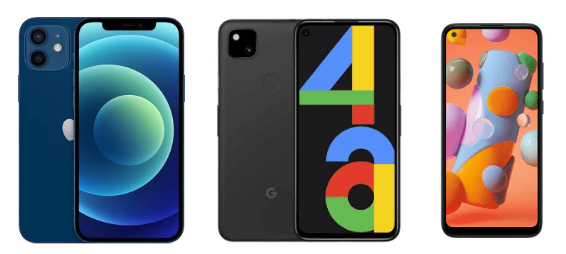

# Some Expectations
- Think about the business problem and how your analysis can address the problem
- Make sure **any chart** you create has: **title, x & y axis labels, and a description of why someone would care to look at it**
- Make sure you spend time understanding what your code does.

## Task 0. Load libraries

Load the following libraries, you may need to install them first!
- Data Manipulation: `pandas`, `numpy`
- Data Visualization：`seaborn`, `matplotlib.pyplot`
- Other: `warnings` (ignore warning messages)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") # suppress the FutureWarning

## Task 1. Stage

1. Use `pd.read_csv()` to read in the `Customer Churn.csv` data file, store it as a data frame named `"df_churn"`

2. Display the first 5 records
> Tip: For wide data, try `df.head().T` to display all the columns

3. Check its shape and respective data types using `info()`


In [2]:
# Use pd.read_csv() to read in the Customer Churn.csv data file, store it as a data frame named "df_churn"
df_churn = pd.read_csv("/content/Customer Churn.csv")

In [4]:
# Display the first 5 records Tip: For wide data, try df.head().T to display all the columns
df_churn.head().T

,0,1,2,3,4
monthly_minutes,22604.0,17059.0,25848.0,22080.0,23871.0
customer_service_calls,2.0,2.0,2.0,3.0,3.0
streaming_minutes,26525.0,16887.0,26783.0,23649.0,7705.0
total_billed,285.0,201.0,264.0,274.0,236.0
prev_balance,47.0,45.0,44.0,49.0,61.0
late_payments,5.0,5.0,6.0,6.0,5.0
ip_address_asn,16767.0,53966.0,19278.0,16680.0,51308.0
phone_area_code,253.0,241.0,232.0,236.0,243.0
customer_reg_date,2020-04-15,2020-04-12,2020-02-22,2020-08-05,2019-11-16
email_domain,yahoo.com,gmail.com,gmail.com,yahoo.com,gmail.com


In [5]:
# Check its shape and respective data types using info()
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90901 entries, 0 to 90900
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   monthly_minutes         90881 non-null  float64
 1   customer_service_calls  90879 non-null  float64
 2   streaming_minutes       90879 non-null  float64
 3   total_billed            90867 non-null  float64
 4   prev_balance            90879 non-null  float64
 5   late_payments           90881 non-null  float64
 6   ip_address_asn          90884 non-null  float64
 7   phone_area_code         90873 non-null  float64
 8   customer_reg_date       90874 non-null  object 
 9   email_domain            90873 non-null  object 
 10  phone_model             90876 non-null  object 
 11  billing_city            90872 non-null  object 
 12  billing_postal          90873 non-null  float64
 13  billing_state           90875 non-null  object 
 14  partner                 90876 non-null

## Task 2. Cleansing & Profiling (Part I)

Our dataset contains in following varibales:
- **monthly_minutes**: Monthly usage in minutes
- **customer_service_calls**:	# of calls to customer services
- **streaming_minutes**: Monthly streaming in minutes
- **total_billed**:	Total bill amount in $
- **prev_balance**:	Previous balance statement
- **late_payments**: # of late payments
- **ip_address_asn**:	IP address
- **phone_area_code**: Phone area code
- **customer_reg_date**: Customer registration date
- **email_domain**:	Customer email
- **phone_model**: Phone model
- **billing_city**:	Billing city
- **billing_postal**:	Billing zip code
- **billing_state**:	Billing state
- **partner**:	A partnering company who helped initiate the phone contract
- **phone_service**:	phone service
- **multiple_lines**:	multiple lines
- **streaming_plan**:	streaming plan
- **mobile_hotspot**:	mobile hotspot
- **wifi_calling_text**: wifi calling text
- **online_backup**:	online backup
- **device_protection**:	device protection
- **number_phones**:	# of phones obtained
- **contract_code**:	code of the contract with the company
- **currency_code**:	payment currency
- **maling_code**:	mailing code
- **paperless_billing**:	opt for paperless billing
- **payment_method**:	payment method
- **customer_id**:	customer id
- **billing_address**: full billing address
- **gender**:	gender
- **network_speed**:	network speed
- **senior_citizen**:	if the customer is a senior citizen
- **churn**:	if the customer churned


1. Let's begin with cleaning the data types:

- Correct the data types for variable `billing_postal`, `phone_area_code`, `ip_address_asn` to **'object'**
> May use the code like this:
```python
df['variable'] = df['variable'].astype('object')
```

- Correct the data type of variable `churn`, `senior_citizen` to **'bool'**

- Correct the data type of variable `customer_reg_date` to **'datetime64'**
> Hint: `pd.to_datetime()`

2. Select all **numerical variables** using `select_dtypes()`, put their column names in a `list`
> Hint: `df.select_dtypes(include=['int64', 'float64']).columns.to_list()`

3. For Loop Automation: Fire up a for loop that creates a histogram for each variable using `sns.histplot()`, with `hue='churn'`.
>Hint: A good reference is [here](https://colab.research.google.com/drive/193chykBcPCS1AJ4u73cblqY_HbvWW86C?usp=sharing).

4. **Articulate 3 key findings you derived from the generated plots**

In [6]:
# Correct the data types for variable billing_postal, phone_area_code, ip_address_asn to 'object'
df_churn['billing_postal'] = df_churn['billing_postal'].astype('object')
df_churn['phone_area_code'] = df_churn['phone_area_code'].astype('object')
df_churn['ip_address_asn'] = df_churn['ip_address_asn'].astype('object')

In [7]:
# Correct the data type of variable churn, senior_citizen to 'bool'
filter_mask = df_churn['churn'] == 1
df_churn['churn'] = filter_mask

In [8]:
# Correct the data type of variable customer_reg_date to 'datetime64'
filter_mask_1 = df_churn['senior_citizen'] == 1
df_churn['senior_citizen'] = filter_mask_1

In [9]:
# Select all numerical variables using select_dtypes(), put their column names in a list
df_churn['customer_reg_date']=pd.to_datetime(df_churn['customer_reg_date'])

In [10]:
# For Loop Automation: Fire up a for loop that creates a histogram for each variable using sns.histplot(), with hue='churn'.numerical_list = []
numerical_list = df_churn.select_dtypes(include=['int64', 'float64']).columns.to_list()
numerical_list

['monthly_minutes',
 'customer_service_calls',
 'streaming_minutes',
 'total_billed',
 'prev_balance',
 'late_payments',
 'number_phones']

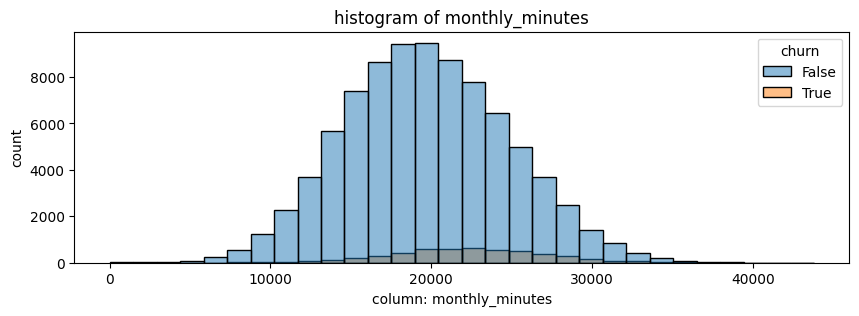

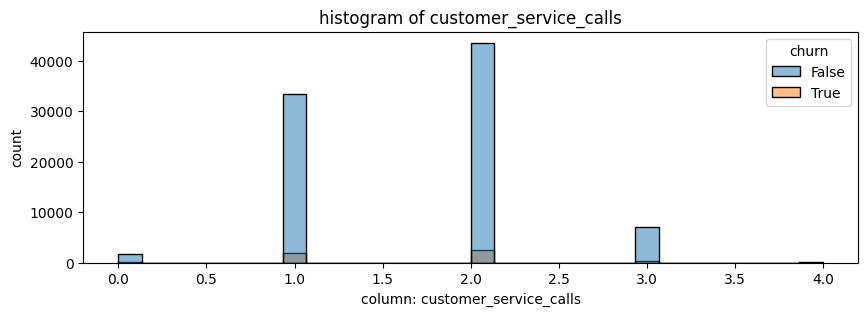

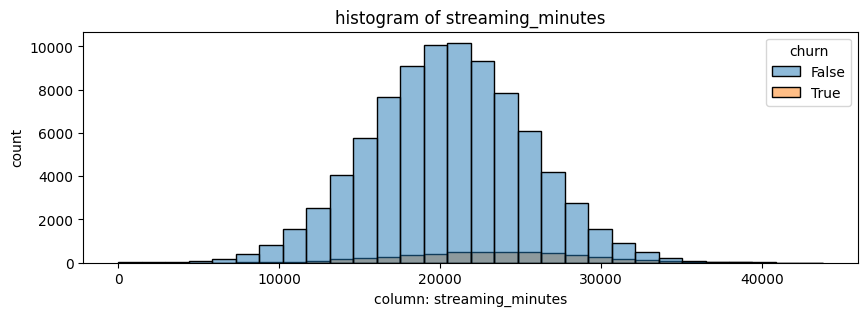

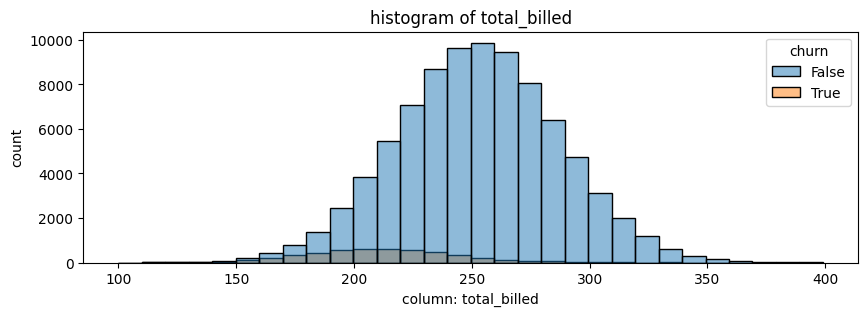

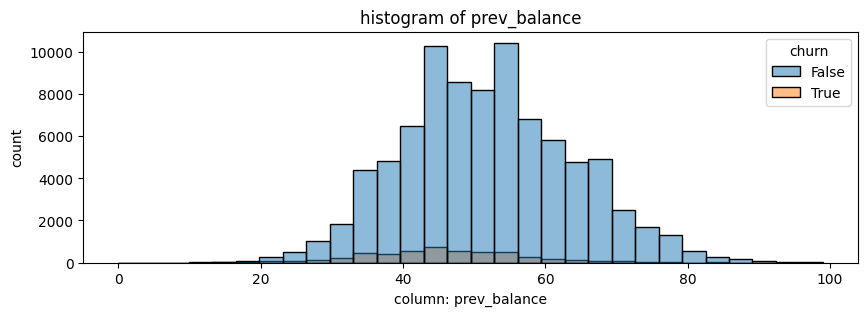

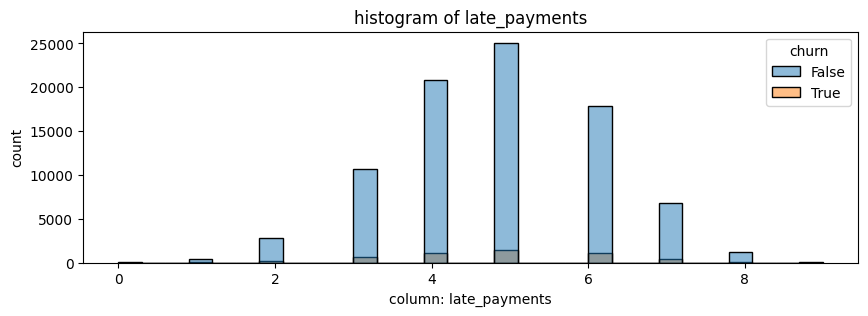

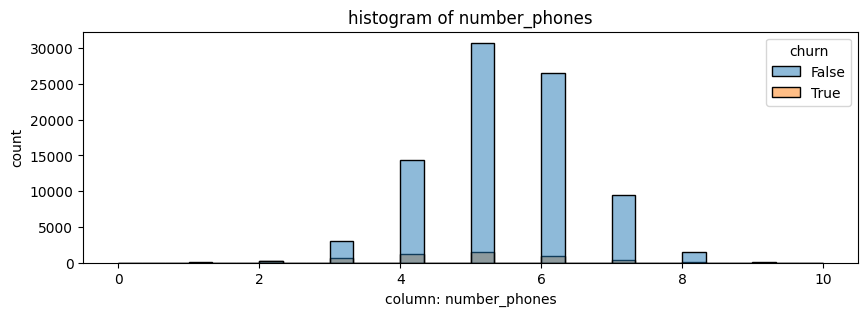

In [11]:
for i in numerical_list:
  plt.figure(figsize=(10,3))
  sns.histplot(data=df_churn, x=i, hue='churn', bins=30)
  plt.title(f"histogram of {i}")
  plt.xlabel(f"column: {i}")
  plt.ylabel("count");

# 3 key finding
Your Findings:
1. From the histogram of monthly_minutes, we could learn that the both churn and not churn have the highest frequency at around 20000-30000 monthly minutes.
2. From the histogram of total_billed, we could learn that the total bill for churn is between 150 and 200, while it is 200 - 300 for people not churn, which have a higher bill than people who churned.
3. From the histogram of prev_balance, we could learn that people's previous balance for who churned is most likely around 40, but for people who not churned is between 30-70



## Task 3. Cleansing & Profiling (Part II)

1. Start by selecting all **categorical and boolean variables** using `select_dtypes()`, put their column names in a `list`
> Hint: include=['object','bool']

2. Remove the following variables from the list: `customer_id`, `billing_address`, `billing_city`, `billing_state`, `billing_postal`, `phone_area_code`, `ip_address_asn`
> Hint: `my_list.remove()`

3. Fire up a for loop which creates a countplot for each variable using `sns.countplot()` - Make sure the bars are ordered for easy comparison
> Hint: `order=df_churn[column].value_counts().index`

4. **Articulate 3 key observations you derived from the generated plots**


In [12]:
# Start by selecting all categorical and boolean variables using select_dtypes(), put their column names in a list
non_numerical_list = df_churn.select_dtypes(include=['object', 'bool']).columns.to_list()
non_numerical_list

['ip_address_asn',
 'phone_area_code',
 'email_domain',
 'phone_model',
 'billing_city',
 'billing_postal',
 'billing_state',
 'partner',
 'phone_service',
 'multiple_lines',
 'streaming_plan',
 'mobile_hotspot',
 'wifi_calling_text',
 'online_backup',
 'device_protection',
 'contract_code',
 'currency_code',
 'maling_code',
 'paperless_billing',
 'payment_method',
 'customer_id',
 'billing_address',
 'gender',
 'network_speed',
 'senior_citizen',
 'churn']

In [13]:
# Remove the following variables from the list: customer_id, billing_address, billing_city, billing_state, billing_postal, phone_area_code, ip_address_asn
non_numerical_list.remove('customer_id')
non_numerical_list.remove('billing_address')
non_numerical_list.remove('billing_city')
non_numerical_list.remove('billing_state')
non_numerical_list.remove('billing_postal')
non_numerical_list.remove('phone_area_code')
non_numerical_list.remove('ip_address_asn')

In [14]:
for element in non_numerical_list:
  print(element)

email_domain
phone_model
partner
phone_service
multiple_lines
streaming_plan
mobile_hotspot
wifi_calling_text
online_backup
device_protection
contract_code
currency_code
maling_code
paperless_billing
payment_method
gender
network_speed
senior_citizen
churn


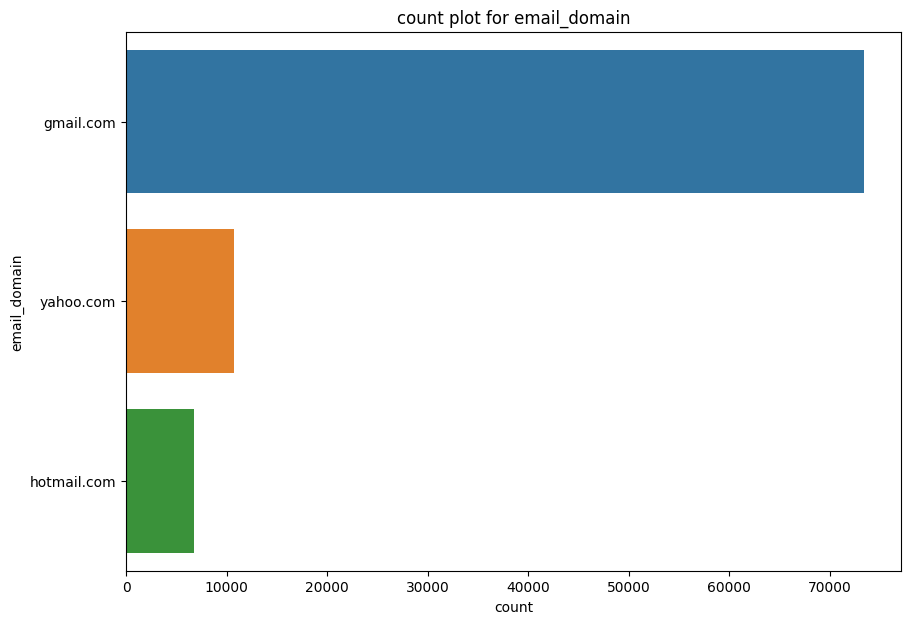

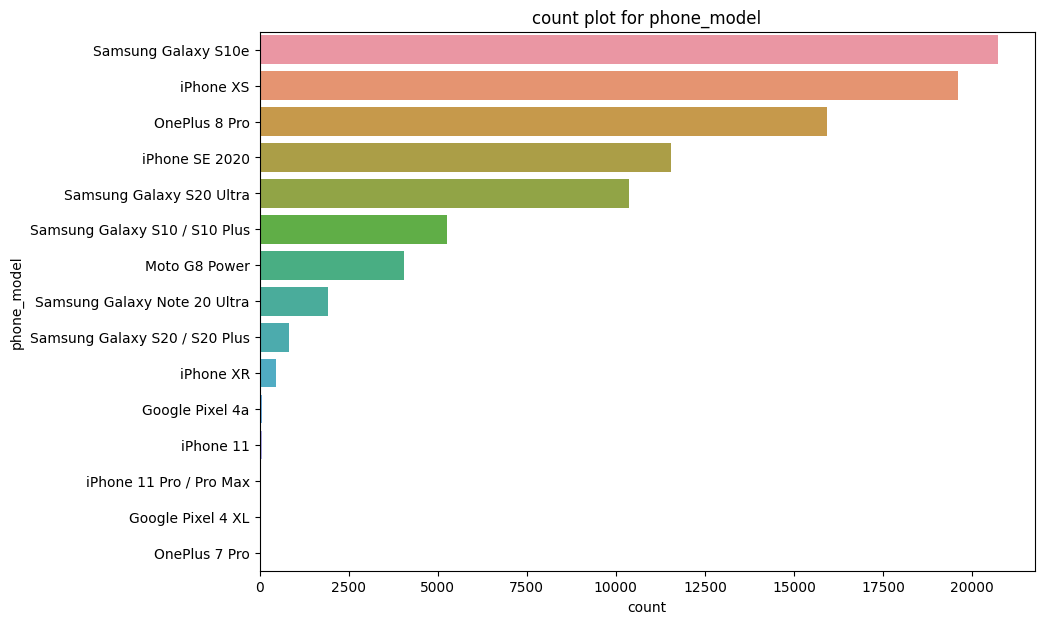

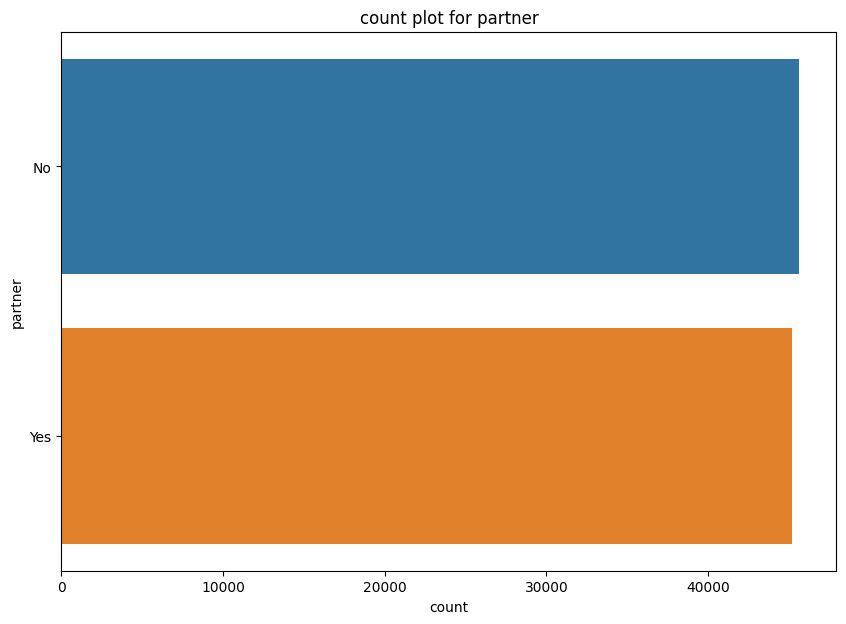

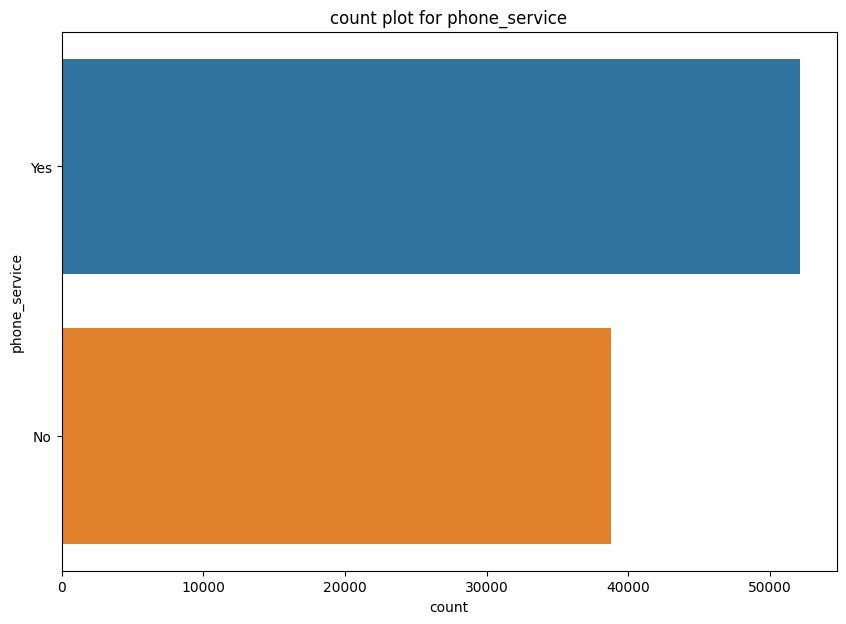

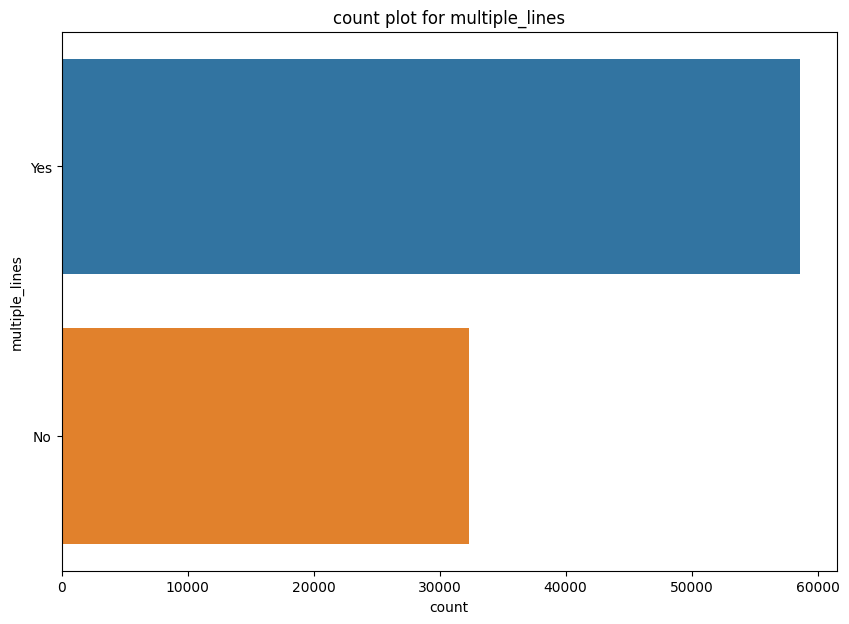

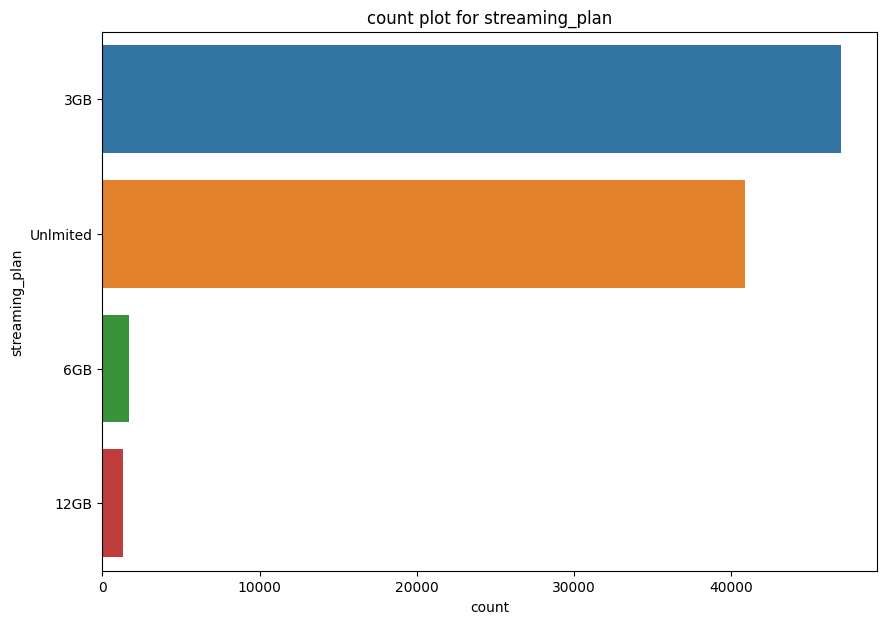

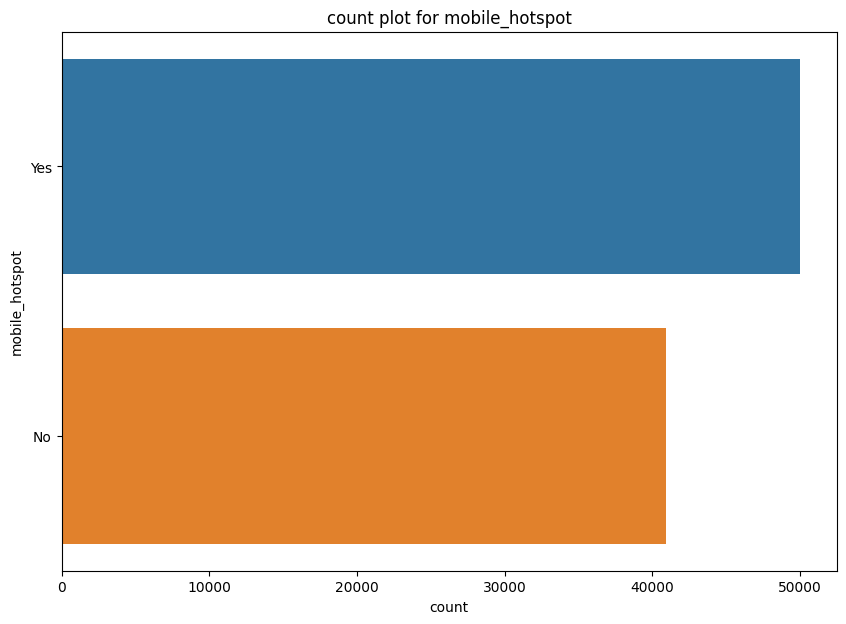

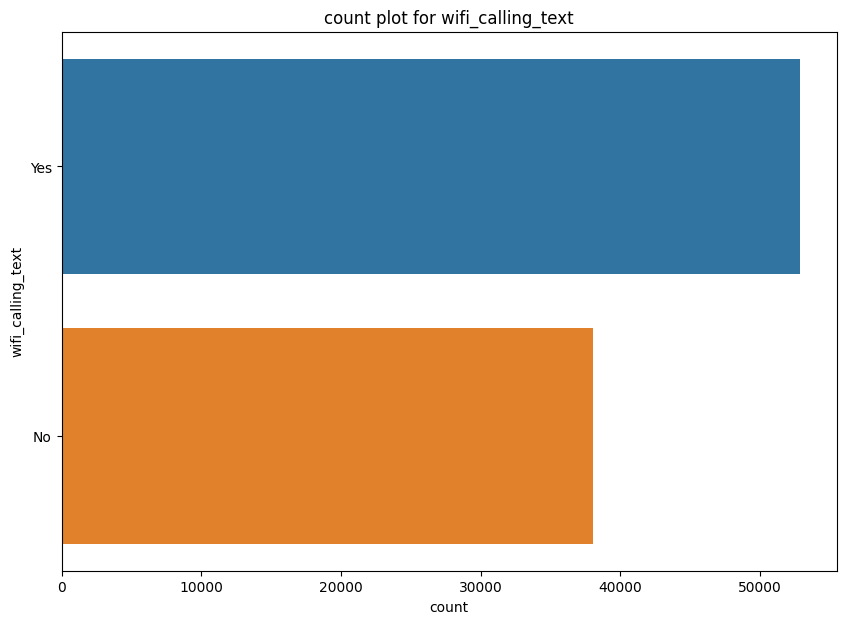

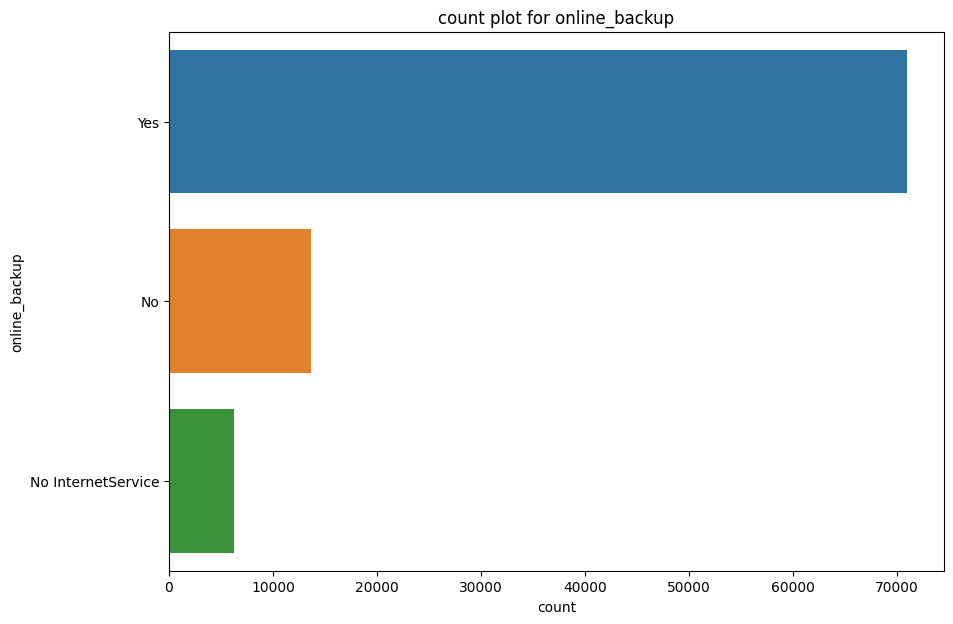

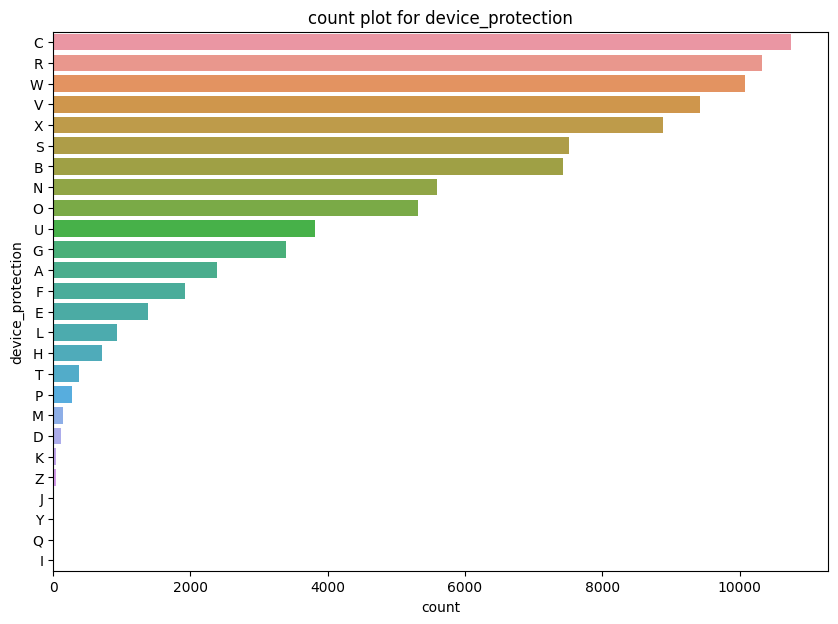

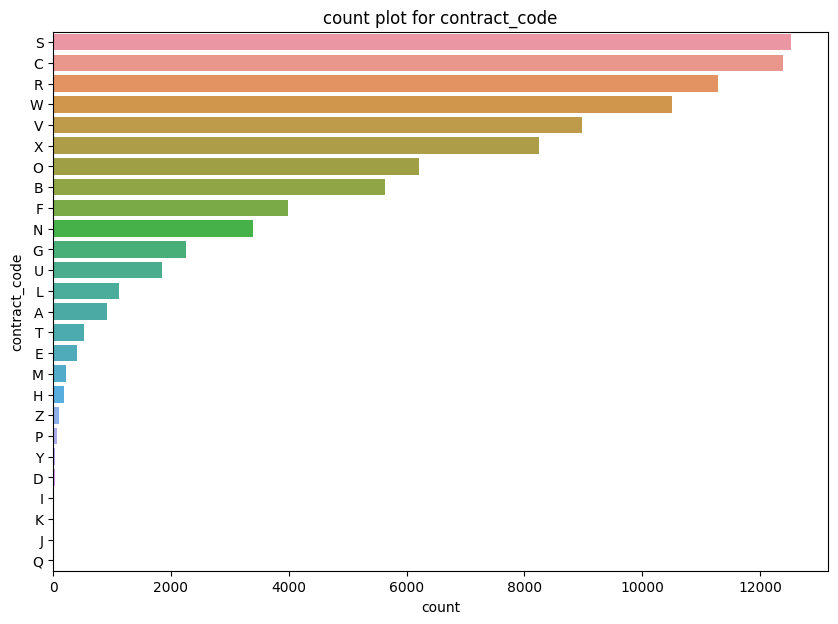

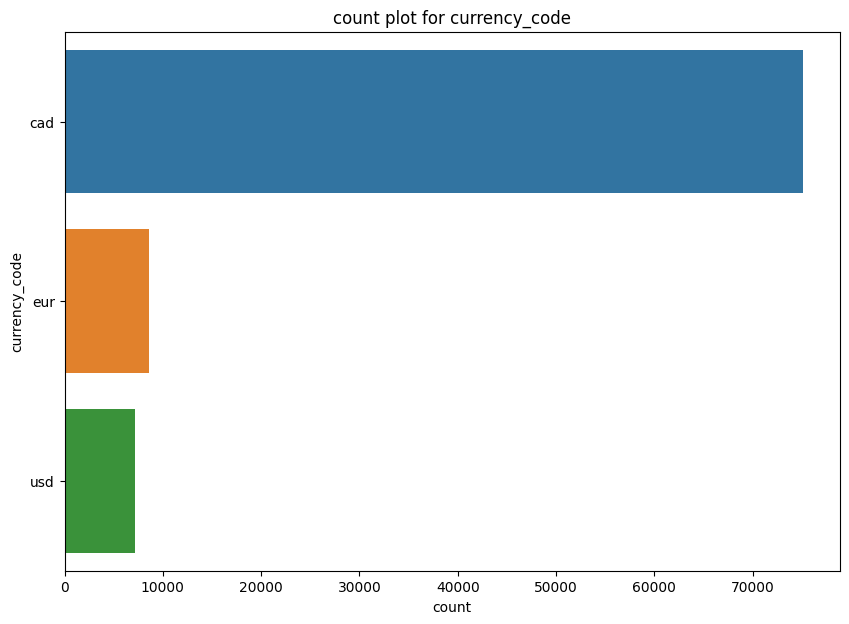

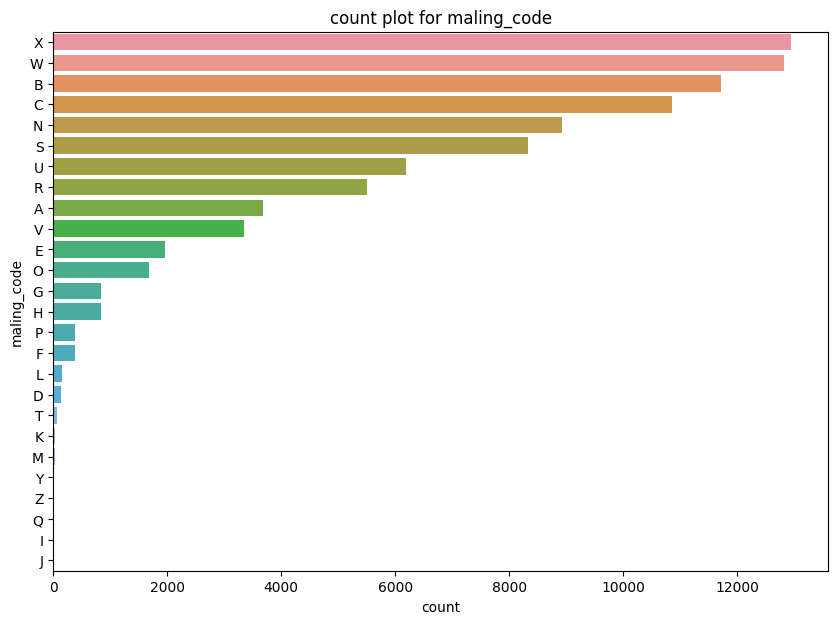

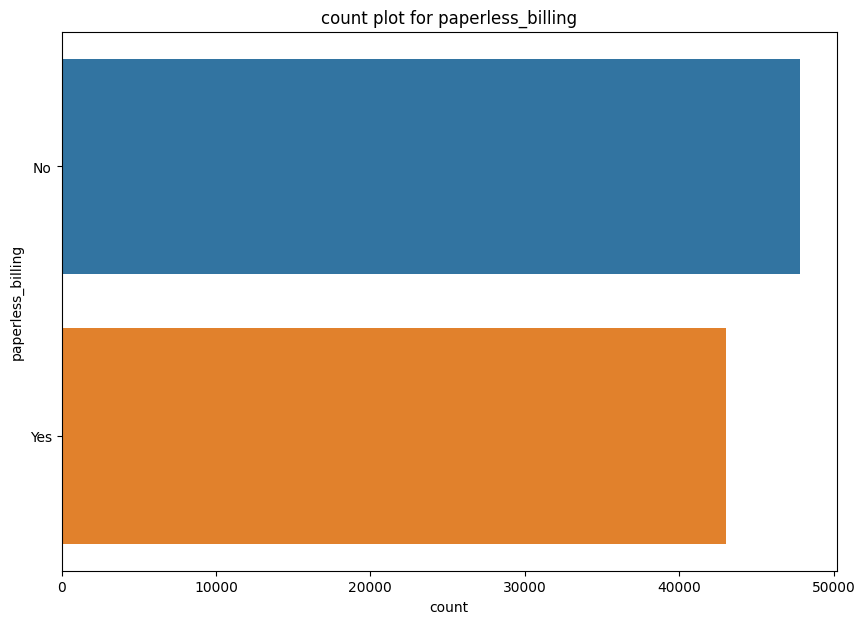

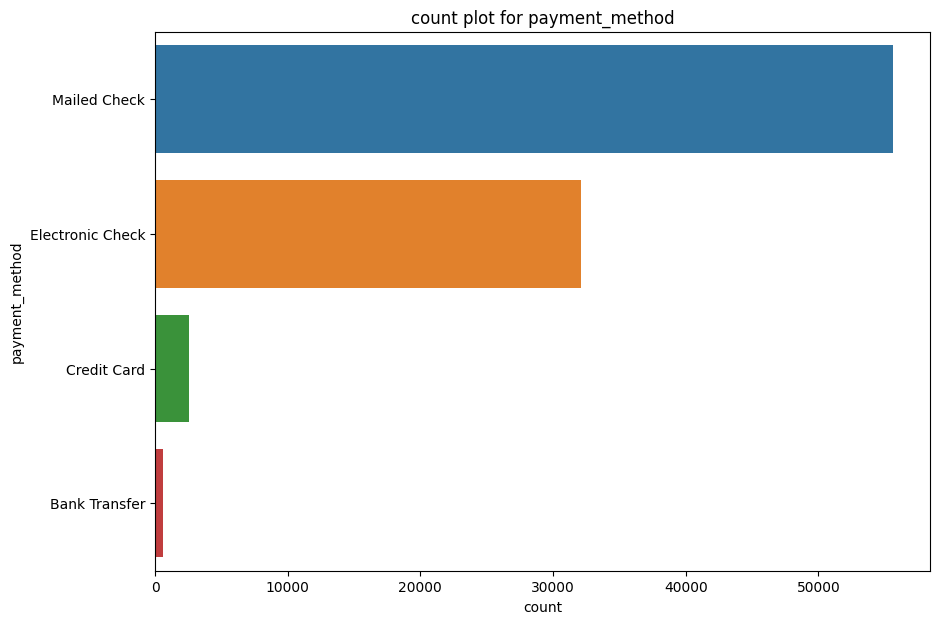

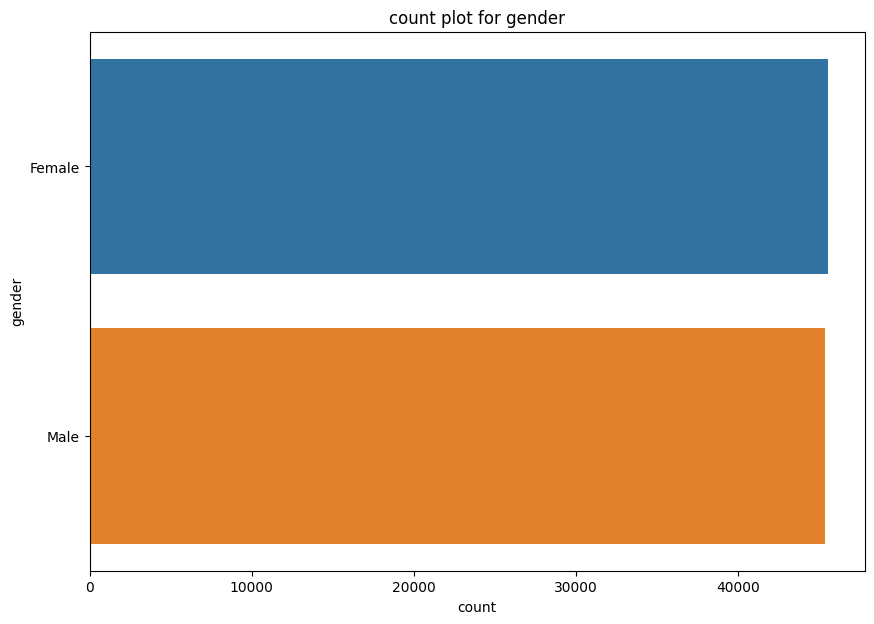

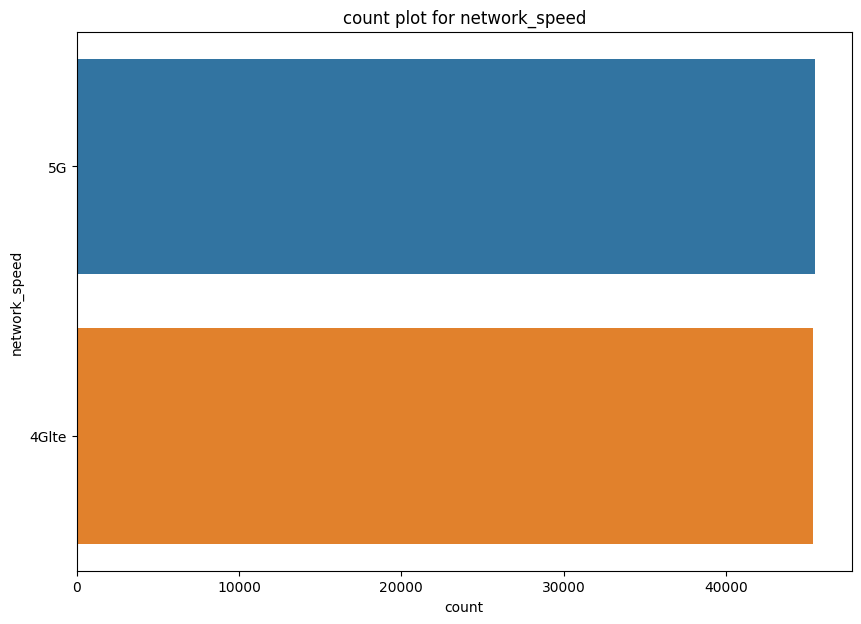

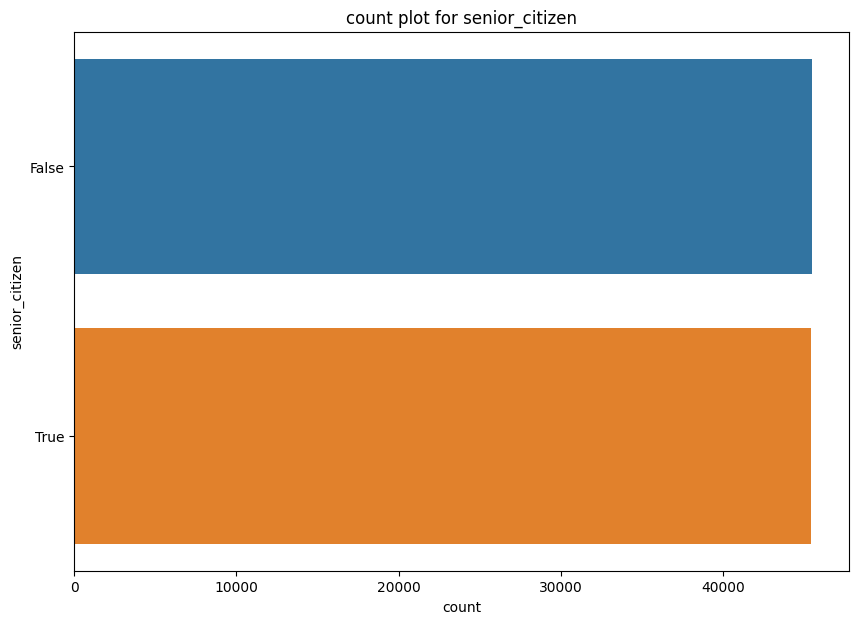

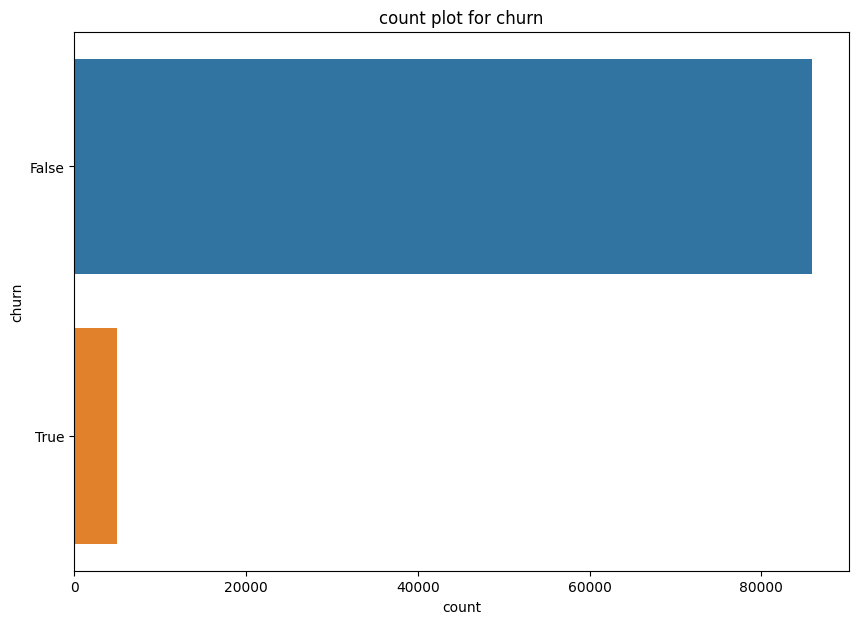

In [15]:
# Fire up a for loop which creates a countplot for each variable using sns.countplot() - Make sure the bars are ordered for easy comparison
def count_plot(element):
  plt.figure(figsize=(10,7))
  sns.countplot(data = df_churn, y=element, order=df_churn[element].value_counts().index)
  plt.title(f'count plot for {element}')
  # plt.xticks(rotation=90)
  plt.xlabel('count')
  plt.show()

for i in non_numerical_list:
  count_plot(i)

# for i in non_numerical_list:
    # sns.countplot(data=df_churn,x = element)
    # plt.show()




# Your Findings:
1. From count plot for phone_model, we could learn that most people uses Samsung Galaxy S10e, and the second max use is Iphone XS, after that is OnePlus 8 Pro
2. From count plot for multiple_line, we could learn that there are more people(almost 60000) have multiple lines than not have multiple lines(around 30000).
3. From count plot for streaming_plan, we can learn that 3GB is the most popular plan, and then the Unlimited. 12GB is the least popular plan which is lower than 6GB.

## Task 4. Analyze & Answer Questions (Part I)

1. States with the most/least churns

- Create a dataset `churn_True` which includes only churned customers
- Use `groupby()` and count `customer_id`
- Identify the **top 5** states with the highest number of churns using `nlargest()`
- Identify the **bottom 3** states with the lowest number of churns using `sort_values()`
- Create a bar chart to visualize the customer count by state - rank your bars in a **descending order**

In [16]:
# Filter the churned customers (churn=1, true) and create a new DataFrame
churn_True = df_churn[df_churn['churn'] == 1]
churn_True

,monthly_minutes,customer_service_calls,streaming_minutes,total_billed,prev_balance,late_payments,ip_address_asn,phone_area_code,customer_reg_date,email_domain,...,currency_code,maling_code,paperless_billing,payment_method,customer_id,billing_address,gender,network_speed,senior_citizen,churn
9,19608.0,2.0,29231.0,170.0,39.0,7.0,45808.0,243.0,2020-10-16,hotmail.com,...,cad,U,No,Mailed Check,1-130-86539-8.11,13939 Jeffrey Knoll Suite 209,Male,5G,False,True
19,32861.0,1.0,16493.0,151.0,55.0,4.0,18069.0,247.0,2020-09-08,gmail.com,...,cad,R,No,Mailed Check,0-7037-2425-8.24,93876 Michael Skyway,Female,4Glte,False,True
20,18885.0,2.0,28510.0,185.0,52.0,6.0,47947.0,257.0,2020-07-19,gmail.com,...,eur,X,No,Electronic Check,1-214-28046-3.25,8627 Mark Street Suite 323,Female,5G,True,True
47,22812.0,2.0,20336.0,239.0,43.0,3.0,55460.0,245.0,2020-06-22,gmail.com,...,cad,W,No,Electronic Check,1-61668-874-2.54,183 Potts Streets,Female,4Glte,False,True
67,21356.0,1.0,21081.0,227.0,26.0,6.0,47395.0,246.0,2020-01-25,gmail.com,...,eur,U,No,Mailed Check,0-692-50023-5.77,980 Jason Mountain,Female,5G,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90819,21501.0,1.0,19329.0,186.0,72.0,3.0,51172.0,278.0,2020-07-23,gmail.com,...,cad,I,No,Mailed Check,1-919053-60-3.100909,6743 Ward Path Apt. 995,Female,5G,False,True
90874,18035.0,2.0,32798.0,189.0,46.0,4.0,15842.0,257.0,2019-11-20,gmail.com,...,eur,V,No,Bank Transfer,1-67076-074-X.100969,1504 Thompson Courts Apt. 258,Male,5G,False,True
90878,14867.0,2.0,15062.0,211.0,44.0,6.0,56967.0,261.0,2020-03-31,gmail.com,...,cad,G,No,Electronic Check,1-06-524253-0.100973,552 Gonzalez Highway,Female,5G,False,True
90881,20132.0,2.0,17638.0,180.0,49.0,4.0,50683.0,257.0,2020-05-19,gmail.com,...,cad,V,No,Mailed Check,1-321-36986-7.100978,6000 Elizabeth Circle Apt. 666,Male,4Glte,True,True


In [17]:
# Group by 'churn' and count by customer_id
churn_count = df_churn.groupby('churn')['customer_id'].count()
churn_count

churn
False    85926
True      4975
Name: customer_id, dtype: int64

In [18]:
# Identify the top 5 states with the highest number of churns using nlargest()
count_by_states = df_churn[df_churn['churn']==1].groupby('billing_state')['churn'].count()
top_5_states = count_by_states.nlargest(5)
top_5_states

billing_state
Alaska          440
Connecticut     420
New Jersey      397
Virginia        384
South Dakota    376
Name: churn, dtype: int64

In [19]:
# Identify the bottom 3 states with the lowest number of churns using sort_values()
sort_state_value = count_by_states.sort_values(ascending=True)
sort_state_value.head(3)

billing_state
Alabama      1
Utah         1
Tennessee    1
Name: churn, dtype: int64

In [20]:
# Create a bar chart to visualize the customer count by state - rank your bars in a descending order
state_churn_reorder = churn_True.groupby('billing_state')['churn'].count()
state_churn_reorder.sort_values(ascending=False)

billing_state
Alaska            440
Connecticut       420
New Jersey        397
Virginia          384
South Dakota      376
Washington        355
Texas             354
Kansas            301
Maryland          257
Michigan          252
Colorado          229
Idaho             190
Illinois          174
Florida           159
Pennsylvania      130
New York          118
South Carolina     86
Nevada             61
Massachusetts      60
Delaware           55
Nebraska           50
North Dakota       32
Iowa               23
Ohio               20
Vermont            12
Oregon             11
Minnesota           9
Mississippi         7
Rhode Island        4
California          3
Alabama             1
Utah                1
Tennessee           1
Wisconsin           1
Name: churn, dtype: int64

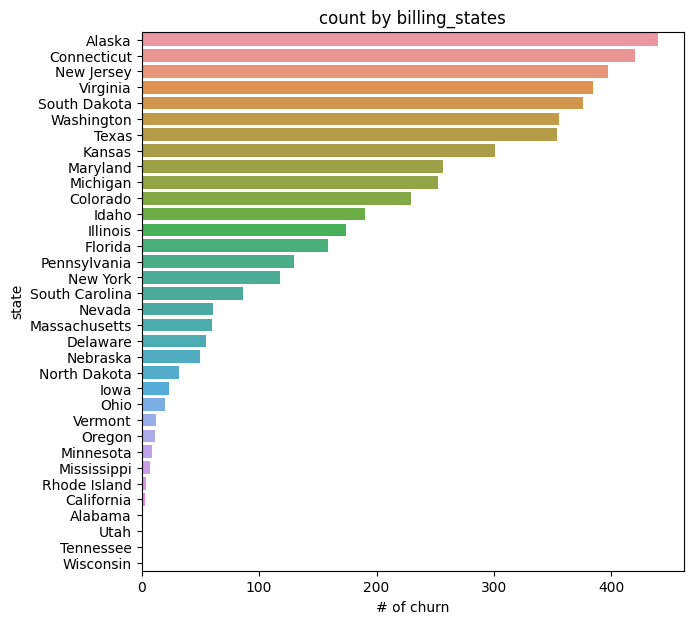

In [21]:
plt.figure(figsize=(7, 7))
sns.countplot(data=churn_True,
            y="billing_state",
            order=state_churn_reorder.sort_values(ascending=False).index)
plt.title('count by billing_states')
plt.xlabel('# of churn')
# Rotate x-axis labels
# plt.xticks(rotation=45)
plt.ylabel('state')
plt.show()

'''
state_churn_reorder.sort_values(ascending=False).plot(kind='bar')
plt.title('count by billing_states')
plt.xlabel('neighbourhood')
# Rotate x-axis labels
plt.ylabel('count')
plt.show();
'''

2. Customers with the highest/lowest total bill amount

- Identify the **top 5 customers** with the highest bill amount（i.e., the top group）

- Identify the **bottom 5 customers** with the lowest bill amount（i.e., the bottom group）

- Summarize variables in both groups using `describe()` - What did you find by comparing the summaries?


In [22]:
# Identify the top 5 customers with the highest bill amount（i.e., the top group）
df_churn.sort_values('total_billed', ascending=False).head(5)['customer_id']
# df_churn.nlargest(5,'total_billed')["total_billed"]

58995    0-219-77140-5.65503
20627    0-691-37725-1.22948
72386    1-63093-682-0.80406
57753    0-7270-4815-5.64124
51863    0-365-21782-4.57569
Name: customer_id, dtype: object

In [23]:
# Identify the bottom 5 customers with the lowest bill amount（i.e., the bottom group）
df_churn.sort_values('total_billed', ascending=True).head(5)['customer_id']

41030    0-87111-352-X.45558
27003    1-260-77732-4.30070
61929    0-03-400057-7.68762
88980    1-377-54830-9.98834
39668    0-11-164302-3.44081
Name: customer_id, dtype: object

In [56]:
# Summarize variables in both groups using describe() - What did you find by comparing the summaries?
df_churn.sort_values('total_billed', ascending = False).head(5).describe().T

,count,mean,std,min,25%,50%,75%,max
monthly_minutes,5.0,25916.0,10616.099872,16020.0,17665.0,22299.0,32622.0,40974.0
customer_service_calls,5.0,2.0,1.224745,0.0,2.0,2.0,3.0,3.0
streaming_minutes,5.0,26227.2,5258.285909,18911.0,23748.0,26346.0,29635.0,32496.0
total_billed,5.0,394.6,5.029911,386.0,395.0,396.0,397.0,399.0
prev_balance,5.0,62.0,7.106335,51.0,61.0,62.0,66.0,70.0
late_payments,5.0,6.4,2.302173,3.0,5.0,8.0,8.0,8.0
number_phones,5.0,4.4,0.547723,4.0,4.0,4.0,5.0,5.0


In [57]:
# Summarize variables in both groups using describe() - What did you find by comparing the summaries?
df_churn.sort_values('total_billed', ascending = True).head(5).describe().T

,count,mean,std,min,25%,50%,75%,max
monthly_minutes,5.0,26819.0,5259.020298,18405.0,25553.0,28226.0,29948.0,31963.0
customer_service_calls,5.0,1.2,0.836660,0.0,1.0,1.0,2.0,2.0
streaming_minutes,5.0,21173.8,5702.231511,12134.0,20945.0,22322.0,22588.0,27880.0
total_billed,5.0,109.8,5.761944,100.0,110.0,111.0,114.0,114.0
prev_balance,5.0,60.6,16.742162,43.0,46.0,59.0,74.0,81.0
late_payments,5.0,4.4,0.547723,4.0,4.0,4.0,5.0,5.0
number_phones,5.0,4.8,1.923538,2.0,4.0,5.0,6.0,7.0


# Your Findings:
The mean of total_billed of the top 5 records is almost 200 more than the mean of the bottom 5 records.
The standard deviation of the top 5 records is 5.03 is less than the the bottom 5 records which is 5.76.
And the max of the total_billed is 399 and the minimum total_billed is 100 for the whole dataset.

## Task 5. Analyze & Answer Questions (Part II)

1. Explore the target variable: Create a bar chart to show the percentage of churners?

2. Explore numerical variables: Create **three** boxplots to inform the following questions (Be sure to explain your reasoning based on the chart)
- Does the total bill amount influence churn?
- Does monthly usage influence churn?
- Does monthly streaming influence churn?

3. Explore categorical variables:
  
  The company believes churn is influenced by the **network speed** (5G or 4G LTE) and the **phone model**; customers who opt for **paperless billing** are less likely to churn. Do you agree? Create 3 charts that can effectively test these ideas.

4. Explore any relationships of your interest (i.e. things you found interesting that may influence customer churn). Provide **3-4 Key findings** based on your charts.

In [34]:
# Explore the target variable: Create a bar chart to show the percentage of churners?
churn_percentage = df_churn["churn"].value_counts(normalize = True)
churn_percentage

False    0.94527
True     0.05473
Name: churn, dtype: float64

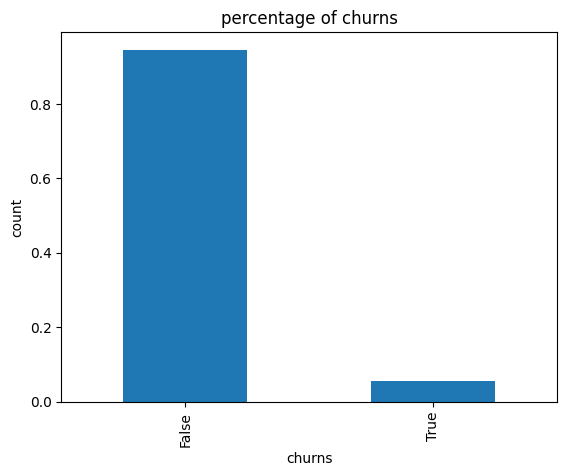

In [41]:
churn_percentage.plot(kind='bar')
plt.title('percentage of churns')
plt.xlabel('churns')
# Rotate x-axis labels
plt.ylabel('count')
plt.show();

'''
churn_percentage = pd.DataFrame(churn_percentage)
plt.figure(figsize=(8,6))
sns.barplot(data = churn_percentage,
            x = ["False", "Ture"],
            y = "churn")
plt.title("Percentage of Churners")
plt.xlabel("Churn Status")
plt.ylabel("Percentage")
plt.show()
'''

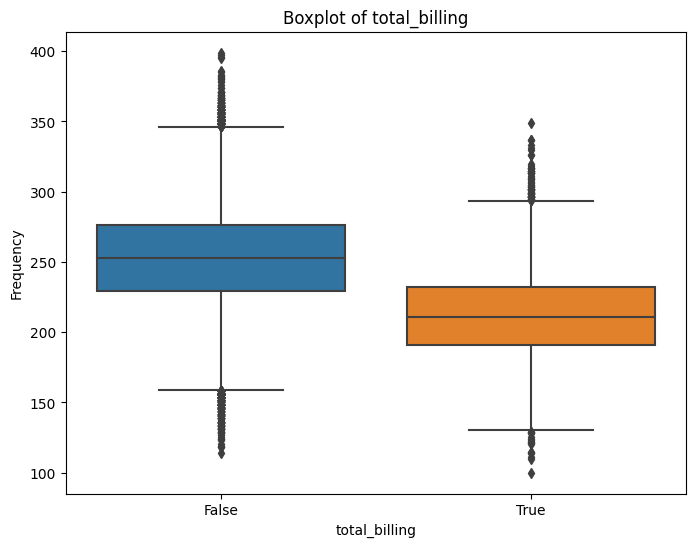

In [39]:
# Explore numerical variables: Create three boxplots to inform the following questions (Be sure to explain your reasoning based on the chart)
# Does the total bill amount influence churn?
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_churn,
            y='total_billed',
            x='churn',
             #x='promo_redemption',
             )
plt.title('Boxplot of total_billing')
plt.xlabel('total_billing')
plt.ylabel('Frequency')
plt.show()

Does the total bill amount influence churn?

For that the frequency for churn and not churn is differnt, so that the total bill amount influences churn.

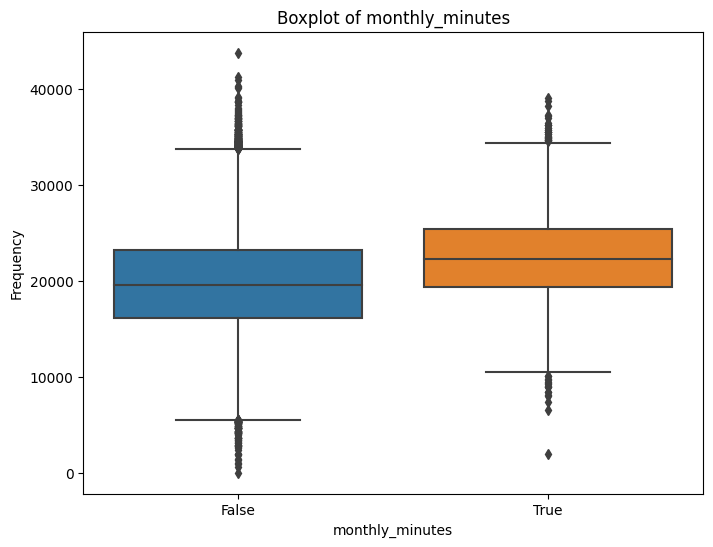

In [42]:
# Does monthly usage influence churn?
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_churn,
            y='monthly_minutes',
            x='churn')
            #x='promo_redemption'
plt.title('Boxplot of monthly_minutes')
plt.xlabel('monthly_minutes')
plt.ylabel('Frequency')
plt.show()

Does monthly usage influence churn?

For that the frequency for churn and not churn is differnt, so that the monthly usage influences churn.

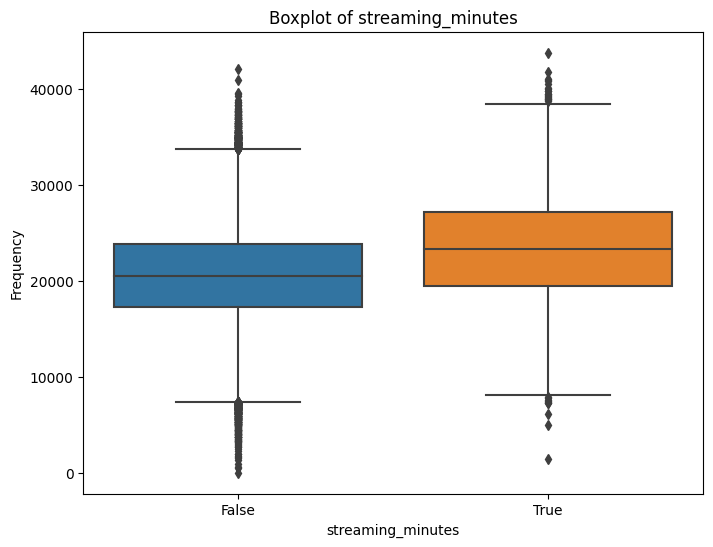

In [43]:
# Does monthly streaming influence churn?
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_churn,
            y='streaming_minutes',
            x='churn'
             )
plt.title('Boxplot of streaming_minutes')
plt.xlabel('streaming_minutes')
plt.ylabel('Frequency')
plt.show()

Does monthly streaming influence churn?

For that the frequency for churn and not churn is differnt, so that the monthly streaming influences churn.


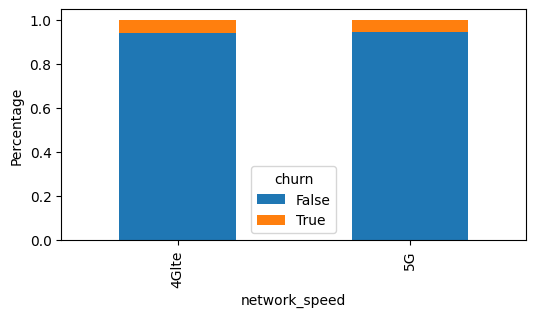

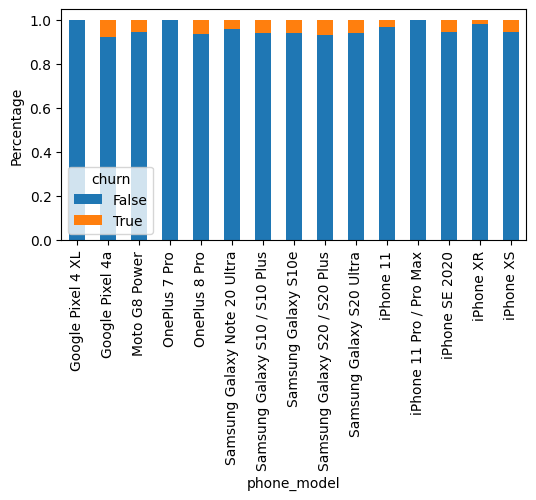

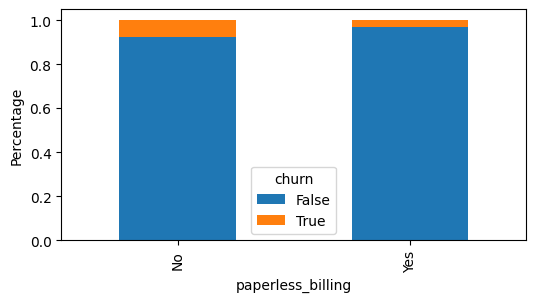

In [55]:
# Explore categorical variables:
# The company believes churn is influenced by the network speed (5G or 4G LTE) and the phone model; customers who opt for paperless billing are less likely to churn. Do you agree? Create 3 charts that can effectively test these ideas.
plot_list = ['network_speed','phone_model','paperless_billing']
def draw_plot(element1):
  # main_category = element1
  bar_chart_var = df_churn.groupby([element1])["churn"].value_counts(normalize=True).unstack()
  bar_chart_var.plot(kind='bar', stacked=True, figsize=(6,3))
  plt.ylabel('Percentage')
  plt.show()
for element1 in plot_list:
  draw_plot(element1)
  '''
  plt.figure(figsize=(10, 4))
  sns.countplot(data=df_churn, y=element1, order=df_churn[element1].value_counts().index)
  plt.title(f'count plot for {element1}')
  plt.xlabel(f'{element1}')
  plt.ylabel('count')
  plt.show()
for element1 in plot_list:
  draw_plot(element1)
  '''


For that the percentage of network speed (5G or 4G LTE) are the same,  churn is not influenced by network speed.


Although the phone_model is the same, the percentage of churn or not churn is different, churn is influence by phone models.

The people who using paperless_billing have the different percentage that churn or not churn, so churn is influence by the paperless billing.

In [73]:
bar_chart_var = df_churn.groupby(["payment_method"])["churn"].value_counts(normalize = True)
bar_chart_var

payment_method    churn
Bank Transfer     False    0.576923
                  True     0.423077
Credit Card       False    0.954420
                  True     0.045580
Electronic Check  False    0.921336
                  True     0.078664
Mailed Check      False    0.962452
                  True     0.037548
Name: churn, dtype: float64

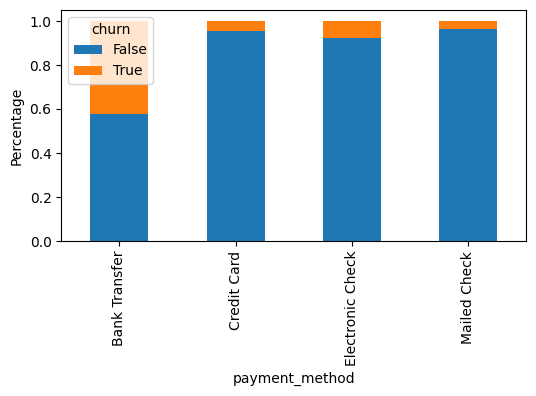

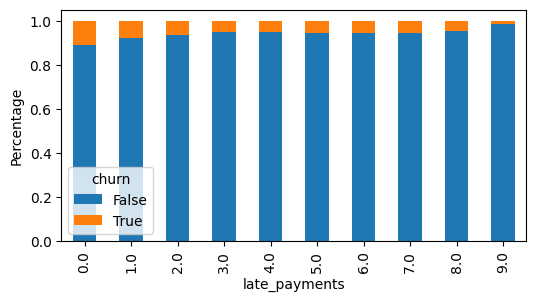

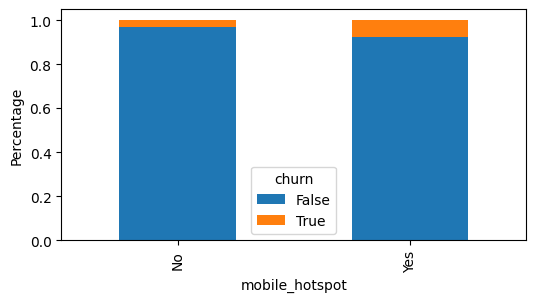

In [65]:
main_category = ['payment_method','late_payments','mobile_hotspot']
for n in main_category:
  draw_plot(n)


Explore any relationships of your interest (i.e. things you found interesting that may influence customer churn). Provide 3-4 Key findings based on your charts.

Your Findings:
1. first chart shows that the percentage of churned is largest for those peole who choose to use bank transfer to pay, and electronic check is next. Mailed check is the least people who churned.
2. next chart shows that people have more late payments are less likely to churned. The percentage of churned are decreased from 1 late payment to 9 late payments.
3. finally, from the graph, we could find that people use mobile hostpot are more likely to churned than people who do not use mobile hotspot.




## Finally
Wrap this up in a notebook and convert it to **HTML**, to exceed the bar - make sure things look good.